In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
x = np.random.randint(0, 10, (9, 9))
x

array([[9, 7, 1, 9, 5, 8, 8, 7, 0],
       [8, 3, 8, 2, 7, 6, 7, 8, 0],
       [5, 7, 2, 5, 8, 9, 7, 6, 3],
       [5, 7, 9, 4, 7, 3, 9, 9, 5],
       [5, 7, 9, 8, 3, 4, 3, 1, 8],
       [2, 4, 1, 9, 9, 5, 8, 9, 0],
       [1, 6, 8, 3, 1, 4, 2, 5, 3],
       [6, 0, 5, 3, 9, 5, 4, 1, 9],
       [9, 7, 4, 2, 9, 8, 1, 6, 5]])

In [25]:
default = np.random.rand(9, 9) > 0.5

In [26]:
draft = np.random.randint(0, 2, [9, 9, 9], dtype=bool)

In [27]:
def plotTable(x, default, draft):
    plt.figure(figsize=(8, 8))
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-0.5, 8.5])
    plt.ylim([8.5, -0.5])
    for i in range(1, 9):
        lw = .7 if i % 3 else 2.5
        plt.plot([-0.5, 8.5], [i-0.5, i-0.5], "k-", lw=lw)  # horizontal
        plt.plot([i-0.5, i-0.5], [-0.5, 8.5], "k-", lw=lw)  # vertical

    for i in range(9):
        for j in range(9):
            if x[i, j] != 0:
                c = "black" if default[i, j] else "blue"
                plt.text(j, i, str(x[i, j]), 
                         horizontalalignment="center", verticalalignment="center", fontsize=24, color=c)
            else:
                for k in range(9):
                    if draft[i, j, k]:
                        plt.text(j+((k%3)-1)/4, i+((k//3)-1)/4, 
                                 str(k+1), 
                                 horizontalalignment="center", verticalalignment="center", fontsize=10, color="gray")

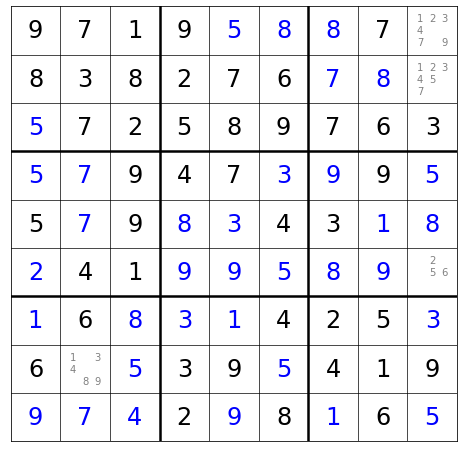

In [28]:
plotTable(x, default, draft)

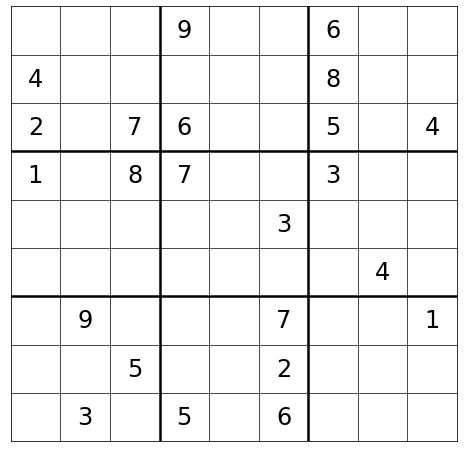

In [30]:
s = """
000900600
400000800
207600504
108700300
000003000
000000040
090007001
005002000
030506000
"""
x = np.zeros([9, 9], dtype=int)
default = np.zeros([9, 9], dtype=bool)
for i in range(9):
    for j in range(9):
        tmp = int(s.split()[i][j])
        x[i, j] = tmp
        default[i, j] = bool(tmp)
draft = np.zeros([9, 9, 9], dtype=bool)
plotTable(x, default, draft)

In [36]:
draft = np.ones([9, 9, 9], dtype=bool)
for i in range(9):
    for j in range(9):
        if x[i, j]:
            draft[i, :, x[i, j]-1] = False
            draft[:, j, x[i, j]-1] = False
            I, J = i // 3, j // 3
            for k in range(3*I, 3*(I+1)):
                for l in range(3*J, 3*(J+1)):
                    draft[k, l, x[i, j]-1] = False

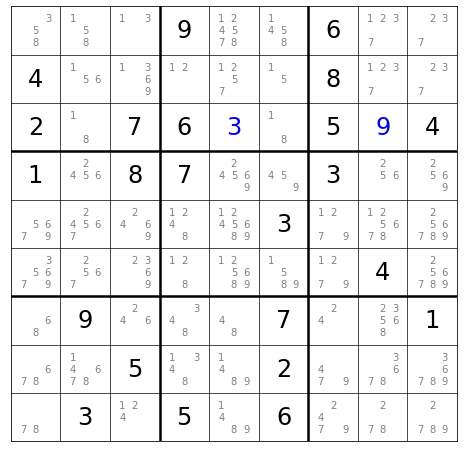

In [37]:
plotTable(x, default, draft)

In [62]:
class Sudoku:
    def __init__(self, s):
        self.x = np.zeros([9, 9], dtype=int)
        self.default = np.zeros([9, 9], dtype=bool)
        for i in range(9):
            for j in range(9):
                tmp = int(s.split()[i][j])
                self.x[i, j] = tmp
                self.default[i, j] = bool(tmp)
        self.draft = np.zeros([9, 9, 9], dtype=bool)
        
    def updateDraft(self):
        self.draft = np.ones([9, 9, 9], dtype=bool)
        for i in range(9):
            for j in range(9):
                if self.x[i, j]:
                    self.draft[i, :, self.x[i, j]-1] = False
                    self.draft[:, j, self.x[i, j]-1] = False
                    I, J = i // 3, j // 3
                    for k in range(3*I, 3*(I+1)):
                        for l in range(3*J, 3*(J+1)):
                            self.draft[k, l, self.x[i, j]-1] = False
        
    def plotTable(self):
        fig = plt.figure(figsize=(8, 8))
        plt.xticks([])
        plt.yticks([])
        plt.xlim([-0.5, 8.5])
        plt.ylim([8.5, -0.5])
        for i in range(1, 9):
            lw = .7 if i % 3 else 2.5
            plt.plot([-0.5, 8.5], [i-0.5, i-0.5], "k-", lw=lw)  # horizontal
            plt.plot([i-0.5, i-0.5], [-0.5, 8.5], "k-", lw=lw)  # vertical
        for i in range(9):
            for j in range(9):
                if self.x[i, j] != 0:
                    c = "black" if self.default[i, j] else "blue"
                    plt.text(j, i, str(self.x[i, j]), 
                             horizontalalignment="center", verticalalignment="center", fontsize=24, color=c)
                else:
                    for k in range(9):
                        if self.draft[i, j, k]:
                            plt.text(j+((k%3)-1)/4, i+((k//3)-1)/4, 
                                     str(k+1), 
                                     horizontalalignment="center", verticalalignment="center", fontsize=10, color="gray")

    def checkValidity(self, i, j, v):
        f = np.any(self.x[i, :] == v)
        f &= np.any(self.x[:, j] == v)
        I, J = i // 3, j // 3
        for k in range(3*I, 3*(I+1)):
            for l in range(3*J, 3*(J+1)):
                f &= (self.x[k, l] == v)
        return not f
    
    def fill(self, i, j, v):
        if self.checkValidity(i, j, v):
            self.x[i, j] = v
            self.updateDraft()
            print("Filled {} to [{},{}]".format(v, i, j))
        else:
            print("{} cannot be filled in [{}, {}]".format(v, i, j))
    
    def __call__(self):
        self.plotTable()
        

In [63]:
m = Sudoku(s)

Filled 3 to [2,4]
Filled 9 to [2,7]


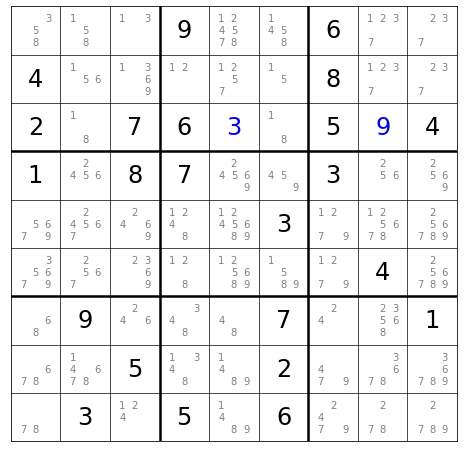

In [64]:
m.fill(2, 4, 3)
m.fill(2, 7, 9)
m()

Filled 9 to [1,2]


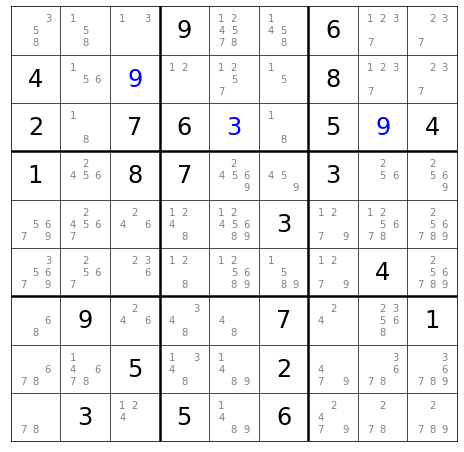

In [65]:
m.fill(1, 2, 9)
m()

Filled 5 to [6,7]


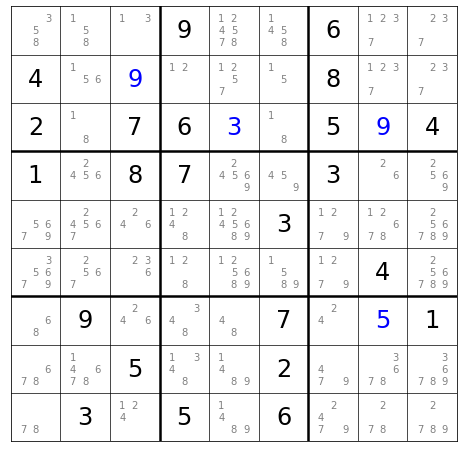

In [66]:
m.fill(6, 7, 5)
m()

Filled 3 to [6,3]


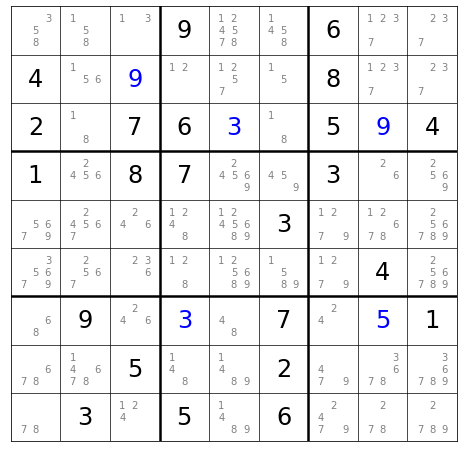

In [67]:
m.fill(6, 3, 3)
m()